### Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Setup

In [3]:
X = np.load('/content/drive/My Drive/x_digits.npy')
Y = np.load('/content/drive/My Drive/y_digits.npy')

In [4]:
X.shape, Y.shape

((35631, 129, 71), (35631,))

The dataset consists of 35361 samples, each of which is a 2-dimensional log-spectogram with the following dimensions: 129 * 71, and the number that it represents (stored as X and Y, respectively).

Now, we split the data into training and test sets, as well as format the X-data into 4D-arrays, which deep learning models can work with.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.reshape([-1, 129, 71, 1])
X_test = X_test.reshape([-1, 129, 71, 1])

In [6]:
X_train.shape
X_test.shape

(7127, 129, 71, 1)

### Fully Connected Neural Network

Let's start with very simple fully connected NN (Neural Network). We will have just three hidden layers, with activation ReLu and Adam optimizer. For all of the NNs we will use 'sparse_categorical_crossentropy' loss function as this is a classification problem. The NN will output 10 different probablities of the given input being a specific number. More about this later.

In [7]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history = model.fit(X_train, Y_train, epochs = 20, validation_split = 0.2)

Epoch 1/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2413 - loss: 6.6158 - val_accuracy: 0.3719 - val_loss: 2.1867
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4348 - loss: 1.9830 - val_accuracy: 0.4973 - val_loss: 1.7859
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5123 - loss: 1.6684 - val_accuracy: 0.5685 - val_loss: 1.3231
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5822 - loss: 1.3705 - val_accuracy: 0.5897 - val_loss: 1.3502
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6098 - loss: 1.2553 - val_accuracy: 0.6080 - val_loss: 1.2230
Epoch 6/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6422 - loss: 1.1082 - val_accuracy: 0.6329 - val_loss: 1.1560
Epoch 7/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6563 - loss: 1.0586 - val_accuracy: 0.6194 - val_loss: 1.1815
Epoch 8/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6755 - loss: 0.9691 - val_accuracy: 

74% for the validation, nice. However, we can see that the difference in accuracy and loss between train and validation is significant which may suggest overfitting. Let's use AdamW as optimizer to apply some built-in regularization.
           
(Comment from ChatGPT about the usage of AdamW:      
Better generalization: The direct weight decay helps prevent weights from growing too large during training. By penalizing large weights, the model is encouraged to find simpler solutions, improving generalization to the validation/test sets and reducing overfitting.

Reduces overfitting impact: Proper weight decay leads to better regularization, helping the model avoid fitting to noise or irrelevant patterns in the training data.)

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.005)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2)

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2792 - loss: 7.6465 - val_accuracy: 0.4510 - val_loss: 1.9772
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4405 - loss: 1.9826 - val_accuracy: 0.4494 - val_loss: 1.9306
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5101 - loss: 1.6023 - val_accuracy: 0.5117 - val_loss: 1.7262
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5413 - loss: 1.5894 - val_accuracy: 0.5382 - val_loss: 1.4913
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5752 - loss: 1.3174 - val_accuracy: 0.5953 - val_loss: 1.4255
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5934 - loss: 1.3951 - val_accuracy: 0.5911 - val_loss: 1.3454
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6212 - loss: 1.2027 - val_accuracy: 0.6083 - val_loss: 1.2113
Epoch 8/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6454 - loss: 1.0916 - val_accuracy: 0.

Well, it did sligthly better but it is still overfitting, let's try increasing the weight decay two times.

In [9]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.01)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2)

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2686 - loss: 6.0573 - val_accuracy: 0.3898 - val_loss: 2.3184
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4510 - loss: 2.0145 - val_accuracy: 0.4696 - val_loss: 1.5917
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5421 - loss: 1.4864 - val_accuracy: 0.5564 - val_loss: 1.3438
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5934 - loss: 1.2491 - val_accuracy: 0.6359 - val_loss: 1.0941
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6342 - loss: 1.0845 - val_accuracy: 0.6350 - val_loss: 1.0936
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6518 - loss: 1.0555 - val_accuracy: 0.6446 - val_loss: 1.0890
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6785 - loss: 0.9719 - val_accuracy: 0.6434 - val_loss: 1.1696
Epoch 8/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6963 - loss: 0.9027 - val_accuracy: 0.

Okay, this has slightly corrected the relation between loss and val-loss, but the relation between accuracy and val-accuracy is still the same. The only difference is that now we might underfitting as the overall acurracy has dipped 10%. Let's try meeting halfway and set the weight decay to 0.0075.

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.0075)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2)

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2615 - loss: 6.5562 - val_accuracy: 0.4704 - val_loss: 1.7327
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4515 - loss: 1.9868 - val_accuracy: 0.4859 - val_loss: 1.6712
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5220 - loss: 1.6786 - val_accuracy: 0.5657 - val_loss: 1.3575
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5944 - loss: 1.3487 - val_accuracy: 0.6234 - val_loss: 1.2590
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6243 - loss: 1.3131 - val_accuracy: 0.6273 - val_loss: 1.2460
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6612 - loss: 1.1023 - val_accuracy: 0.6708 - val_loss: 1.0451
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6971 - loss: 0.9406 - val_accuracy: 0.7058 - val_loss: 0.9095
Epoch 8/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7181 - loss: 0.8581 - val_accuracy: 0.

Let's compare to see which weight decay value performs the best:   

* 0: accuracy: 0.8227 - loss: 0.5262 - val_accuracy: 0.7481 - val_loss: 0.8269
* 0.005: accuracy: 0.8347 - loss: 0.4720 - val_accuracy: 0.7693 - val_loss: 0.7910
* 0.0075: accuracy: 0.7592 - loss: 0.6894 - val_accuracy: 0.6823 - val_loss: 1.0159
* 0.01: accuracy: 0.7401 - loss: 0.7571 - val_accuracy: 0.6764 - val_loss: 1.0275

We can clearly see that 0.005 performs the best, gives the best accuracy and lowest loss values. Let's go with this one then. Let's add some callbacks to see if we can still reduce some overfitting. We are going to add early stopping and Learning rate scheduler. Let's remove one layer too.

In [11]:
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)

In [12]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(125, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(75, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(40, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.0075)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.1226 - loss: 5.2800 - val_accuracy: 0.1319 - val_loss: 2.2500 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1407 - loss: 2.2389 - val_accuracy: 0.1582 - val_loss: 2.1895 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1481 - loss: 2.2164 - val_accuracy: 0.1219 - val_loss: 2.2808 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1256 - loss: 2.2675 - val_accuracy: 0.1519 - val_loss: 2.1948 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1611 - loss: 2.1716 - val_accuracy: 0.1994 - val_loss: 2.1565 - learning_rate: 5.0000e-04
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2076 - loss: 2.0694 - val_accuracy: 0.2698 - val_loss: 2.1307 - learning_rate: 5.0000e-04
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2573 - loss:

Cool! Adding callbacks improved the situation as well as adding some extra layers with number of neurons formed in a funnel. We have actually changed the weight decay to 0.0075 as it performs better with more layers now. Let's see if we can reduce the number of neurons.

In [13]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(150, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(50, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(25, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.0075)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.1393 - loss: 3.6102 - val_accuracy: 0.1608 - val_loss: 2.2100 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1658 - loss: 2.2018 - val_accuracy: 0.1652 - val_loss: 2.1517 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1791 - loss: 2.1359 - val_accuracy: 0.2196 - val_loss: 2.0409 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2345 - loss: 2.0253 - val_accuracy: 0.2422 - val_loss: 1.9467 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2782 - loss: 1.9214 - val_accuracy: 0.2689 - val_loss: 1.8818 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3047 - loss: 1.8131 - val_accuracy: 0.3233 - val_loss: 1.7656 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3349 - loss: 1.7187 

Okay, this didn't work out well. Let's go other way, add two more layers and increase the number of neurons.

In [14]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(400, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(300, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(150, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(50, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.0075)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - accuracy: 0.2823 - loss: 6.7513 - val_accuracy: 0.5573 - val_loss: 1.3747 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5885 - loss: 1.2913 - val_accuracy: 0.7127 - val_loss: 0.9143 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6961 - loss: 0.9648 - val_accuracy: 0.7223 - val_loss: 0.9156 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7398 - loss: 0.8600 - val_accuracy: 0.7634 - val_loss: 0.7907 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7761 - loss: 0.7234 - val_accuracy: 0.7532 - val_loss: 0.7638 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8058 - loss: 0.6048 - val_accuracy: 0.7921 - val_loss: 0.6481 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8193 - loss: 0.5617 

Now that's definitely overfitting. Let's reduce the layers and number of neurons to be slighty above the two steps before.

In [15]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(250, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(150, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(50, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.0075)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.2778 - loss: 6.3912 - val_accuracy: 0.5048 - val_loss: 1.6489 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5355 - loss: 1.5365 - val_accuracy: 0.6245 - val_loss: 1.1570 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6300 - loss: 1.1512 - val_accuracy: 0.6730 - val_loss: 1.0500 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6927 - loss: 0.9359 - val_accuracy: 0.6792 - val_loss: 0.9783 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7318 - loss: 0.8165 - val_accuracy: 0.7197 - val_loss: 0.9167 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7696 - loss: 0.6960 - val_accuracy: 0.7728 - val_loss: 0.7074 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7812 - loss: 0.6487 

Still not good, let's try early stopping on val_accuracy.

In [16]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(250, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(150, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(50, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.0075)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2752 - loss: 5.7737 - val_accuracy: 0.5090 - val_loss: 1.5568 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5627 - loss: 1.3602 - val_accuracy: 0.6366 - val_loss: 1.0916 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6622 - loss: 1.0270 - val_accuracy: 0.6551 - val_loss: 1.0712 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7168 - loss: 0.8614 - val_accuracy: 0.7465 - val_loss: 0.7497 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7478 - loss: 0.7630 - val_accuracy: 0.7479 - val_loss: 0.7872 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7823 - loss: 0.6645 - val_accuracy: 0.7593 - val_loss: 0.7564 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8347 - loss: 0.4848 -

Also doesn't work, let's add BatchNormalization layer to the NN with 4 hidden layers.

(ChatGPT: Batch Normalization: Add batch normalization layers to stabilize and accelerate training, reduce overfitting, and help with generalization. )

In [17]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(125, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(75, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(40, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.0075)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3689 - loss: 1.8204 - val_accuracy: 0.6420 - val_loss: 1.0593 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6574 - loss: 0.9929 - val_accuracy: 0.6480 - val_loss: 1.0644 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7309 - loss: 0.7863 - val_accuracy: 0.7150 - val_loss: 0.8468 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7731 - loss: 0.6565 - val_accuracy: 0.7230 - val_loss: 0.8298 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8116 - loss: 0.5481 - val_accuracy: 0.7620 - val_loss: 0.7374 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8368 - loss: 0.4747 - val_accuracy: 0.7832 - val_loss: 0.6526 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8561 - loss: 0.4191 - 

Still 12% difference, overifitting, not satisfied. The batchNormalization did not work well. Let's try droput layer.

In [18]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten()) #Flattens a multidim input to 1D so it can be used for Dense layers
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(125, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(75, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(40, activation = "relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay=0.075)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
early_stopping_cb= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 2)

history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2, callbacks=[early_stopping_cb, lr_scheduler])
FullyConnectedModel = model

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1561 - loss: 6.3106 - val_accuracy: 0.2749 - val_loss: 1.9472 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2625 - loss: 2.0054 - val_accuracy: 0.3206 - val_loss: 1.7824 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2946 - loss: 1.8784 - val_accuracy: 0.3829 - val_loss: 1.6566 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3558 - loss: 1.7548 - val_accuracy: 0.4171 - val_loss: 1.5935 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3756 - loss: 1.6927 - val_accuracy: 0.4696 - val_loss: 1.4525 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4255 - loss: 1.5717 - val_accuracy: 0.5559 - val_loss: 1.2481 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4810 - loss: 1.4314 - 

YEAAAAH!! Randomly droping neurons in the shallow layers was the key for finding model which doesn't overfit. The model runs longer now, but it performs better. This is our FINAL model for fully connected NN.

In [19]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9118 - loss: 0.2767
Loss + accuracy on train data: [0.3046707510948181, 0.9025049209594727]
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8442 - loss: 0.4590
Loss + accuracy on test data: [0.46645379066467285, 0.8446751832962036]


### Convolutional Neural Network

We start of with a small neural network, keeping the size of the feature maps relatively small. As advised we use the ReLu activation function. The size of the feature map is 3 x 3. We also use EarlyStopping callback and Learning Rate callback.

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(X_train[0].shape))
model.add(tf.keras.layers.Conv2D(8, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = "True")
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.002)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 30, validation_split=0.2, callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1344 - loss: 3.1241 - val_accuracy: 0.2314 - val_loss: 1.9940 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2741 - loss: 1.8979 - val_accuracy: 0.6986 - val_loss: 0.8362 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7960 - loss: 0.6121 - val_accuracy: 0.8691 - val_loss: 0.3913 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9063 - loss: 0.2817 - val_accuracy: 0.9058 - val_loss: 0.3020 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9418 - loss: 0.1776 - val_accuracy: 0.9035 - val_loss: 0.3271 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9583 - loss: 0.1283 - val_accuracy: 0.9097 - val_loss: 0.3265 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9733 - loss: 0.0833 -

Let's add more things so that the model doesn't overfit. We will increase the number of the feature maps, add a batchNormalization layer to generalize better. Finally, we will add the GlobalAveragePooling2D layer to tackle overfitting even more.

In [21]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(X_train[0].shape))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation="softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=1)

optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0005, weight_decay=0.005)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


history = model.fit(
    X_train, Y_train,
    epochs=30,
    validation_split=0.2,
    callbacks=[EarlyStoppingCB, LearningRateCB]
)

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.4077 - loss: 1.7413 - val_accuracy: 0.6152 - val_loss: 1.1864 - learning_rate: 5.0000e-04
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8444 - loss: 0.5072 - val_accuracy: 0.8491 - val_loss: 0.4716 - learning_rate: 5.0000e-04
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9041 - loss: 0.3093 - val_accuracy: 0.8860 - val_loss: 0.3751 - learning_rate: 5.0000e-04
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9231 - loss: 0.2449 - val_accuracy: 0.8770 - val_loss: 0.3929 - learning_rate: 5.0000e-04
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9465 - loss: 0.1777 - val_accuracy: 0.9128 - val_loss: 0.2761 - learning_rate: 2.5000e-04
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9561 - loss: 0.1447 - val_accuracy: 0.9277 - val_loss: 0.2270 - learning_rate: 2.5000e-04
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy

In [22]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9896 - loss: 0.0432
Loss + accuracy on train data: [0.05963369086384773, 0.9834058284759521]
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9531 - loss: 0.1486
Loss + accuracy on test data: [0.1521511971950531, 0.9539778232574463]


That is so impressive! The few percent differnce in accuracy is acceptable in terms of overfitting. This model does exceptionally well in figuring out which number is said.


### Diagrams
We will base the diagrams on the Fully Connected NN model, because it performs significantly worse than the Convolutional Model, thus giving us a chance to showcase some places where it might have issues.

In [32]:
model = FullyConnectedModel
single_example = X_test[0]  # Example, take the first sample from the test set
single_example = single_example.reshape(129, 71, 1)  # Reshape to (129, 71, 1)

# Expand dimensions to make it a batch of size 1 (shape becomes (1, 129, 71, 1))
single_example = np.expand_dims(single_example, axis=0)

# Make a prediction
prediction = model.predict(single_example, verbose=0)

# Print the prediction (depending on your output layer, this could be probabilities or class labels)
prediction, Y_test[0]

(array([[2.0920572e-05, 2.1097399e-03, 3.2218952e-05, 2.7457303e-03,
         1.9583732e-04, 8.5299993e-01, 1.0238740e-06, 8.3966246e-03,
         8.1525686e-06, 1.3348992e-01]], dtype=float32),
 5.0)

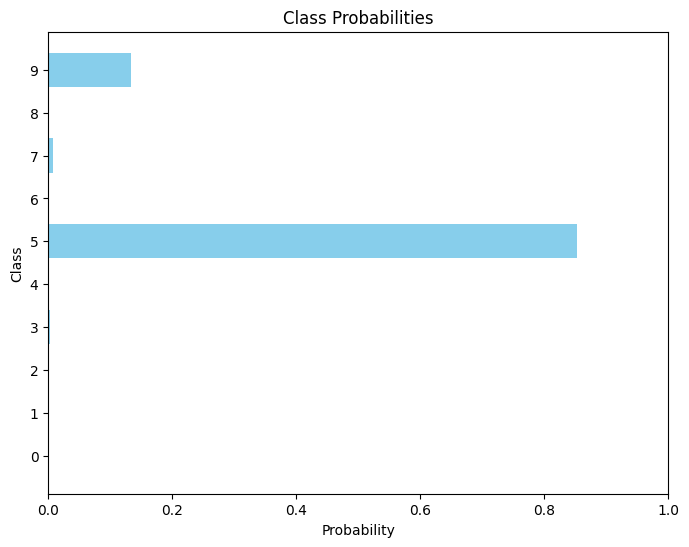

In [24]:
classes = np.arange(10)

probabilities = prediction.flatten()
# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(classes, probabilities, color='skyblue')
plt.yticks(classes)
plt.xlabel('Probability')
plt.ylabel('Class')
plt.title('Class Probabilities')
plt.xlim(0, 1)  # Since it's a probability, we limit the x-axis to [0, 1]

# Show the plot
plt.show()

Seems like the model was very confident that this recording represented a 5. Let's see a case where the probability was less than 50%:

Prediction found with confidence less than 50.0% for index 24
Predicted probabilities: [[0.00450533 0.04893588 0.02416229 0.10962366 0.011151   0.28193504
  0.09724196 0.01632289 0.34217453 0.0639474 ]]
True label: 8.0


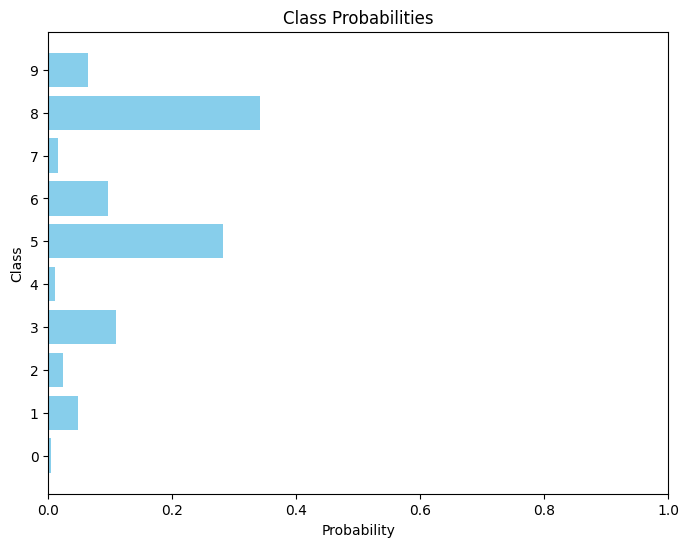

In [30]:
threshold = 0.5
for i in range(len(X_test)):
    single_example = X_test[i].reshape(129, 71, 1)  # Reshape each example
    single_example = np.expand_dims(single_example, axis=0)

    prediction = model.predict(single_example, verbose=0)  # Get prediction
    max_prob = np.max(prediction)

    if max_prob < threshold:
        print(f"Prediction found with confidence less than {threshold*100}% for index {i}")
        print(f"Predicted probabilities: {prediction}")
        print(f"True label: {Y_test[i]}")

        # Plot the probabilities for this prediction
        probabilities = prediction.flatten()
        plt.figure(figsize=(8, 6))
        plt.barh(classes, probabilities, color='skyblue')
        plt.yticks(classes)
        plt.xlabel('Probability')
        plt.ylabel('Class')
        plt.title('Class Probabilities')
        plt.xlim(0, 1)  # Since it's a probability, we limit the x-axis to [0, 1]

        plt.show()

        break

Here, the model predicted a 38% chance for a 8, and a 35% chance for a 5. This could potentially be a pair the model finds difficult? Let's investigate a case where the probability was less than 30%.

Prediction found with confidence less than 30.0% for index 26
Predicted probabilities: [[0.04568185 0.1424573  0.18169972 0.10429564 0.07711645 0.07797844
  0.07461844 0.07877748 0.1046074  0.11276732]]
True label: 4.0


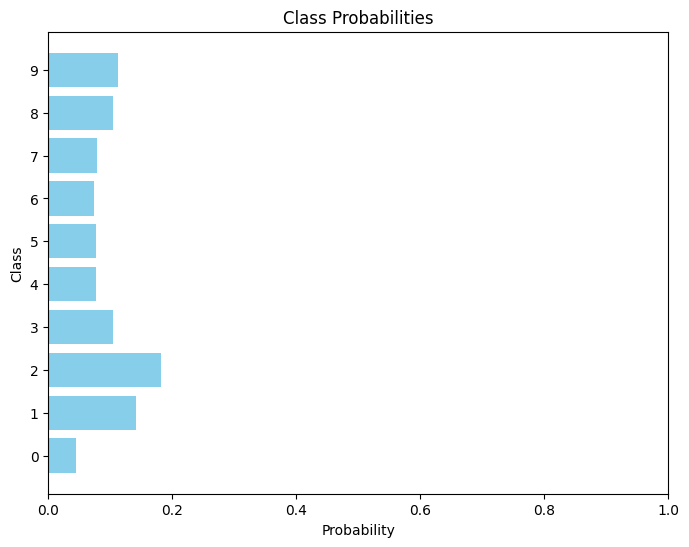

In [31]:
threshold = 0.3
for i in range(len(X_test)):
    single_example = X_test[i].reshape(129, 71, 1)
    single_example = np.expand_dims(single_example, axis=0)

    prediction = model.predict(single_example, verbose=0)
    max_prob = np.max(prediction)

    if max_prob < threshold:
        print(f"Prediction found with confidence less than {threshold*100}% for index {i}")
        print(f"Predicted probabilities: {prediction}")
        print(f"True label: {Y_test[i]}")


        probabilities = prediction.flatten()
        plt.figure(figsize=(8, 6))
        plt.barh(classes, probabilities, color='skyblue')
        plt.yticks(classes)
        plt.xlabel('Probability')
        plt.ylabel('Class')
        plt.title('Class Probabilities')
        plt.xlim(0, 1)

        plt.show()

        break

In this case, the maximum confidence is around 20% for 2. The model is almost equally uncertain between 2 and 1. But the true label was 4, so the model is completely off in this situation.
 Let's see what are the pairs that the model confuses most often:

In [28]:
predictions = model.predict(X_train)

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


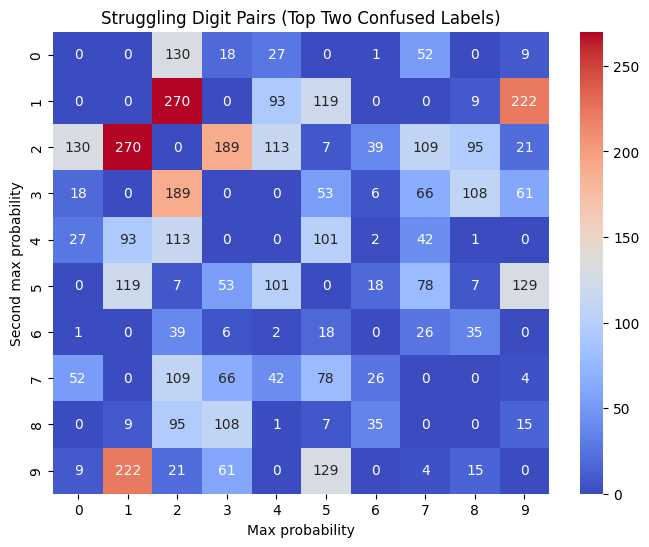

In [34]:
# Threshold for uncertainty
threshold = 0.5

# Dictionary to count the struggling pairs (true_label, predicted_label)
struggling_pairs = Counter()

# Iterate through predictions and corresponding true labels
for probs, true_label in zip(predictions, Y_train):
    max_prob = np.max(probs)  # Get the highest probability
    # Only consider uncertain predictions where max probability is less than 50%
    if max_prob < threshold:
        # Get the two highest probabilities and their corresponding class labels
        top_two = probs.argsort()[-2:][::-1]  # Indices of the top two probabilities
        top1_label = top_two[0]  # Class with the highest probability
        top2_label = top_two[1]  # Class with the second highest probability

        # Sort the labels to avoid double-counting (i.e., (0,2) and (2,0) are the same)
        sorted_pair = tuple(sorted([top1_label, top2_label]))

        # Count the struggling pair (order doesn't matter)
        struggling_pairs[sorted_pair] += 1

# Initialize a confusion matrix (10x10 since we have digits 0-9)
confusion_matrix = np.zeros((10, 10))

# Populate the confusion matrix with the struggling pairs
for (label1, label2), count in struggling_pairs.items():
    confusion_matrix[label1, label2] = count
    confusion_matrix[label2, label1] = count  # Symmetric update

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Max probability')
plt.ylabel('Second max probability')
plt.title('Struggling Digit Pairs (Top Two Confused Labels)')
plt.show()

Cooool, 2 and 1 are mixed up the most by our rules of 'mixing up'. 2 and 3, 1 and 9 are the runners up. On the other hand, there are numbers like 4 and 6 that are alm,ost never mixed up together.

### Summary

This was interesting an assignment. We can clearly see the power of Convolutional NN when it comes to dealing with images. It has reached a whopping 93% accuracy on a test set.  However, it is also worth noting that it requires enormous computational resources as CNN would run significantly longer than a Fully Connected NN. The latter performed slightly worse, yet suprisingly well with accuracy of 87%. As mentioned, the compilation time of Fully Connected NN is relatively small so that is definitely an advantage.